In [ ]:
import pandas as pd
import numpy as np


linear regression

In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime, timedelta

# Load the data - replace 'your_dataset.csv' with the actual filename
df = pd.read_csv('/content/train111.csv')

# Ensure the column names match your dataset
# Replace 'resting_state' and 'active_state' with the correct column names from your dataset
X = df[['age', 'resting_state', 'active_state']]  # Use the correct column names
y = df['HR']

# Create the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Function to generate future data for the next two weeks
def generate_future_data(start_date, num_days):
    future_dates = [start_date + timedelta(days=i) for i in range(num_days)]
    # Adjust dates to be between 1 and 15
    for i in range(num_days):
        day = (i % 15) + 1  # Adjust day to be between 1 and 15
        future_dates[i] = future_dates[i].replace(day=day)
    future_data = pd.DataFrame({'age': np.random.randint(20, 80, num_days),
                                'resting_state': np.random.randint(60, 100, num_days),
                                'active_state': np.random.randint(60, 100, num_days)})
    future_data['date'] = future_dates
    return future_data

# Function to check if forecasted values are outside the predefined thresholds and trigger alerts
def check_and_alert(heart_rate, upper_threshold=100, lower_threshold=60):
    if heart_rate > upper_threshold:
        return f'Alert: Heart rate above threshold ({upper_threshold}).'
    elif heart_rate < lower_threshold:
        return f'Alert: Heart rate below threshold ({lower_threshold}).'
    else:
        return 'Heart rate within normal range.'

# Get the maximum date from the dataset
max_date = pd.to_datetime(df['date']).max()

# Generate future data for the next two weeks
start_date = max_date + timedelta(days=1)
num_days = 14  # Next two weeks
future_data = generate_future_data(start_date, num_days)

# Predict the heart rate for each future date
# Replace 'resting_state' and 'active_state' with the correct column names
future_heart_rate = model.predict(future_data[['age', 'resting_state', 'active_state']])

# Check if the forecasted values are outside the predefined thresholds and trigger alerts
for i in range(len(future_heart_rate)):
    alert = check_and_alert(future_heart_rate[i])
    if 'Alert' in alert:
        print(f'At {future_data["date"].iloc[i]}: {alert}')
    else:
        print(f'At {future_data["date"].iloc[i]}: Heart rate prediction: {future_heart_rate[i]:.2f}')

# Calculate regression metrics
y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('\nRegression Metrics:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


At 1970-01-01 00:00:00.000000015: Heart rate prediction: 67.51
At 1970-01-02 00:00:00.000000015: Heart rate prediction: 66.78
At 1970-01-03 00:00:00.000000015: Heart rate prediction: 68.45
At 1970-01-04 00:00:00.000000015: Heart rate prediction: 67.89
At 1970-01-05 00:00:00.000000015: Heart rate prediction: 66.30
At 1970-01-06 00:00:00.000000015: Heart rate prediction: 66.57
At 1970-01-07 00:00:00.000000015: Heart rate prediction: 67.30
At 1970-01-08 00:00:00.000000015: Heart rate prediction: 67.23
At 1970-01-09 00:00:00.000000015: Heart rate prediction: 67.84
At 1970-01-10 00:00:00.000000015: Heart rate prediction: 68.26
At 1970-01-11 00:00:00.000000015: Heart rate prediction: 66.54
At 1970-01-12 00:00:00.000000015: Heart rate prediction: 67.52
At 1970-01-13 00:00:00.000000015: Heart rate prediction: 68.32
At 1970-01-14 00:00:00.000000015: Heart rate prediction: 66.66

Regression Metrics:
Mean Absolute Error: 8.14
Mean Squared Error: 106.86
R-squared: 0.00


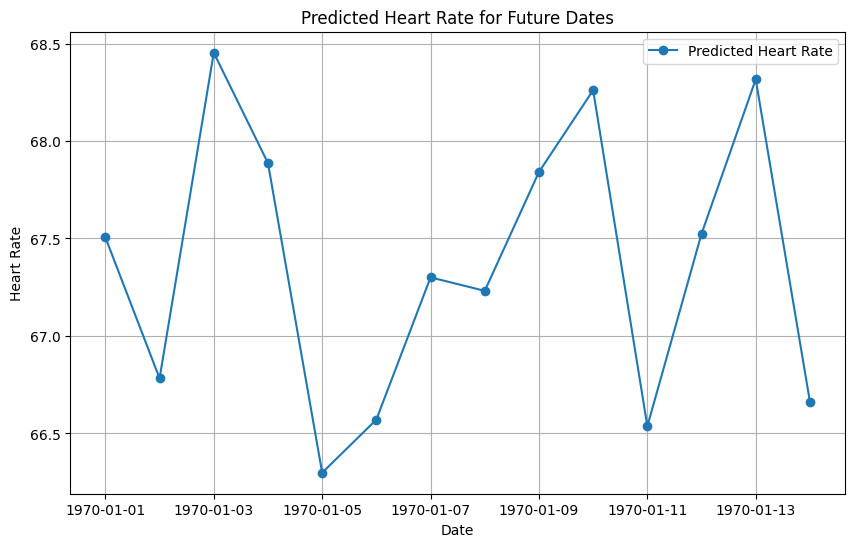

In [16]:
import matplotlib.pyplot as plt

# Plot predicted heart rates for future dates
plt.figure(figsize=(10, 6))
plt.plot(future_data['date'], future_heart_rate, label='Predicted Heart Rate', marker='o')
plt.xlabel('Date')
plt.ylabel('Heart Rate')
plt.title('Predicted Heart Rate for Future Dates')
plt.legend()
plt.grid(True)
plt.show()


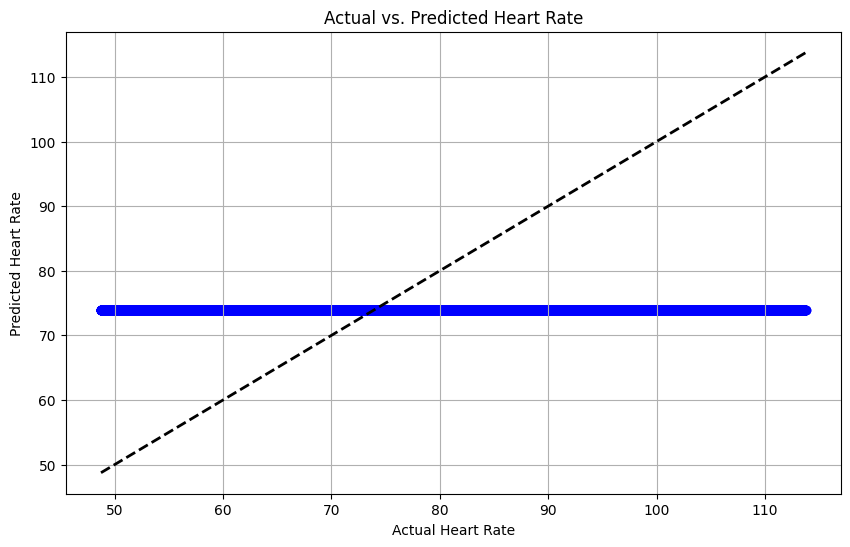

In [17]:
# Scatter plot for actual vs. predicted heart rate
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Heart Rate')
plt.ylabel('Predicted Heart Rate')
plt.title('Actual vs. Predicted Heart Rate')
plt.grid(True)
plt.show()


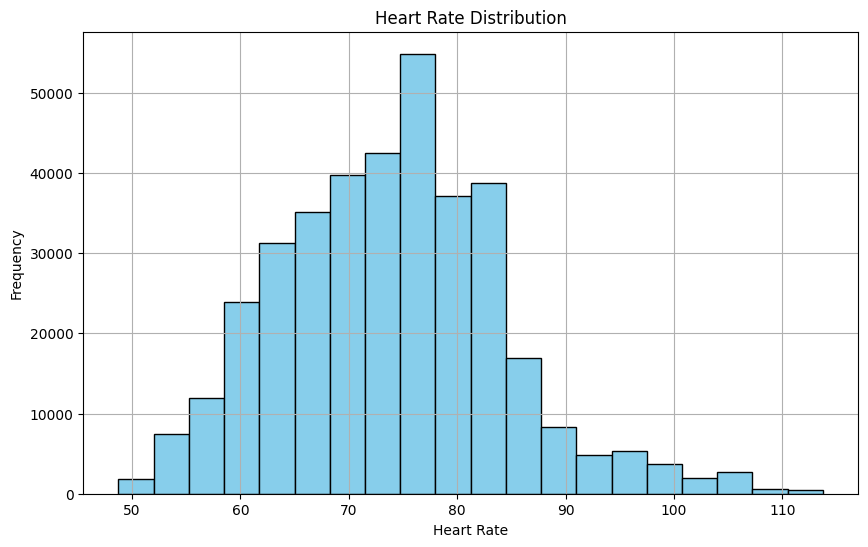

In [18]:
# Histogram of heart rates
plt.figure(figsize=(10, 6))
plt.hist(y, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution')
plt.grid(True)
plt.show()


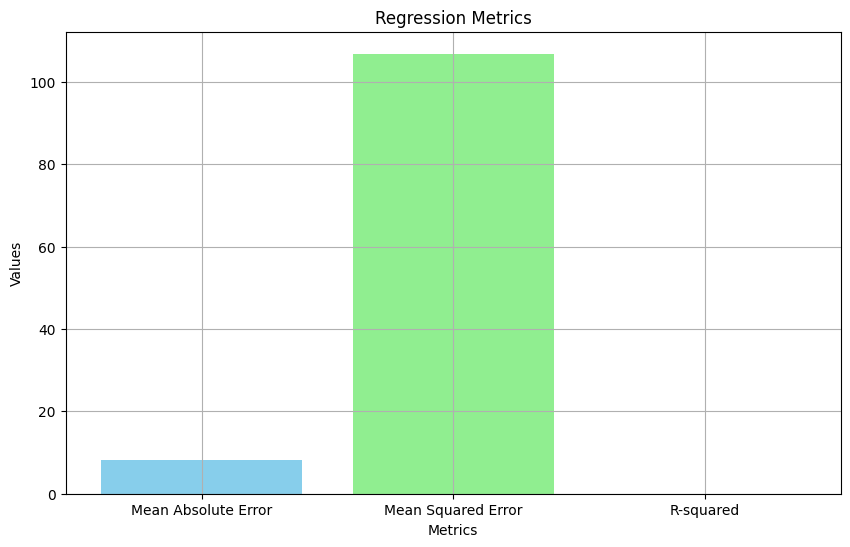

In [19]:
# Bar chart for regression metrics
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'R-squared']
values = [mae, mse, r2]
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Regression Metrics')
plt.grid(True)
plt.show()


random forest

In [20]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime, timedelta

# Load the data - replace 'your_dataset.csv' with the actual filename
df = pd.read_csv('/content/train111.csv')

# Ensure the column names match your dataset
# Replace 'resting_state' and 'active_state' with the correct column names from your dataset
X = df[['age', 'resting_state', 'active_state']]  # Use the correct column names
y = df['HR']

# Create the Random Forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Function to generate future data for the next two weeks
def generate_future_data(start_date, num_days):
    future_dates = [start_date + timedelta(days=i) for i in range(num_days)]
    # Adjust dates to be between 1 and 15
    for i in range(num_days):
        day = (i % 15) + 1  # Adjust day to be between 1 and 15
        future_dates[i] = future_dates[i].replace(day=day)
    future_data = pd.DataFrame({'age': np.random.randint(20, 80, num_days),
                                'resting_state': np.random.randint(60, 100, num_days),
                                'active_state': np.random.randint(60, 100, num_days)})
    future_data['date'] = future_dates
    return future_data

# Function to check if forecasted values are outside the predefined thresholds and trigger alerts
def check_and_alert(heart_rate, upper_threshold=100, lower_threshold=60):
    if heart_rate > upper_threshold:
        return f'Alert: Heart rate above threshold ({upper_threshold}).'
    elif heart_rate < lower_threshold:
        return f'Alert: Heart rate below threshold ({lower_threshold}).'
    else:
        return 'Heart rate within normal range.'

# Get the maximum date from the dataset
max_date = pd.to_datetime(df['date']).max()

# Generate future data for the next two weeks
start_date = max_date + timedelta(days=1)
num_days = 14  # Next two weeks
future_data = generate_future_data(start_date, num_days)

# Predict the heart rate for each future date using the Random Forest model
# Replace 'resting_state' and 'active_state' with the correct column names
future_heart_rate = rf_model.predict(future_data[['age', 'resting_state', 'active_state']])

# Check if the forecasted values are outside the predefined thresholds and trigger alerts
for i in range(len(future_heart_rate)):
    alert = check_and_alert(future_heart_rate[i])
    if 'Alert' in alert:
        print(f'At {future_data["date"].iloc[i]}: {alert}')
    else:
        print(f'At {future_data["date"].iloc[i]}: Heart rate prediction: {future_heart_rate[i]:.2f}')

# Calculate regression metrics
y_pred = rf_model.predict(X)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('\nRegression Metrics:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


At 1970-01-01 00:00:00.000000015: Heart rate prediction: 74.10
At 1970-01-02 00:00:00.000000015: Heart rate prediction: 73.92
At 1970-01-03 00:00:00.000000015: Heart rate prediction: 73.27
At 1970-01-04 00:00:00.000000015: Heart rate prediction: 73.80
At 1970-01-05 00:00:00.000000015: Heart rate prediction: 73.90
At 1970-01-06 00:00:00.000000015: Heart rate prediction: 73.77
At 1970-01-07 00:00:00.000000015: Heart rate prediction: 74.67
At 1970-01-08 00:00:00.000000015: Heart rate prediction: 73.98
At 1970-01-09 00:00:00.000000015: Heart rate prediction: 74.04
At 1970-01-10 00:00:00.000000015: Heart rate prediction: 73.81
At 1970-01-11 00:00:00.000000015: Heart rate prediction: 73.95
At 1970-01-12 00:00:00.000000015: Heart rate prediction: 73.95
At 1970-01-13 00:00:00.000000015: Heart rate prediction: 73.23
At 1970-01-14 00:00:00.000000015: Heart rate prediction: 73.89

Regression Metrics:
Mean Absolute Error: 8.14
Mean Squared Error: 106.76
R-squared: 0.00


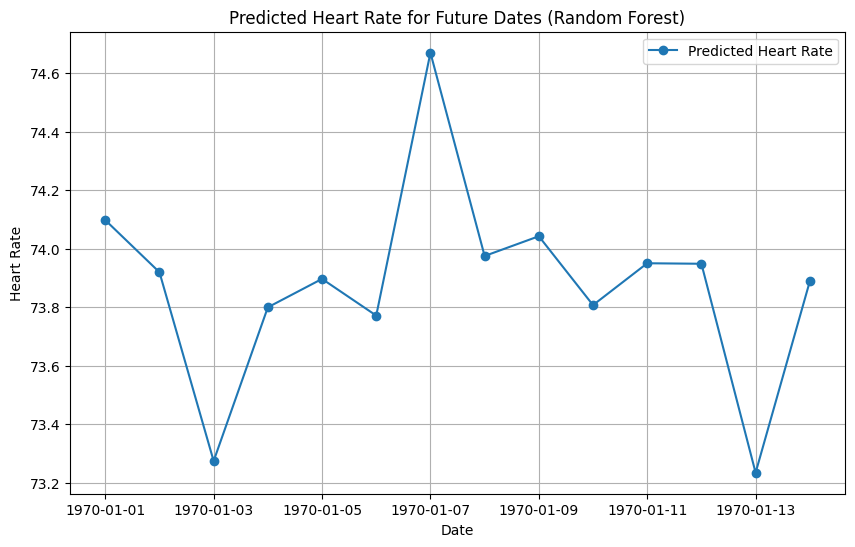

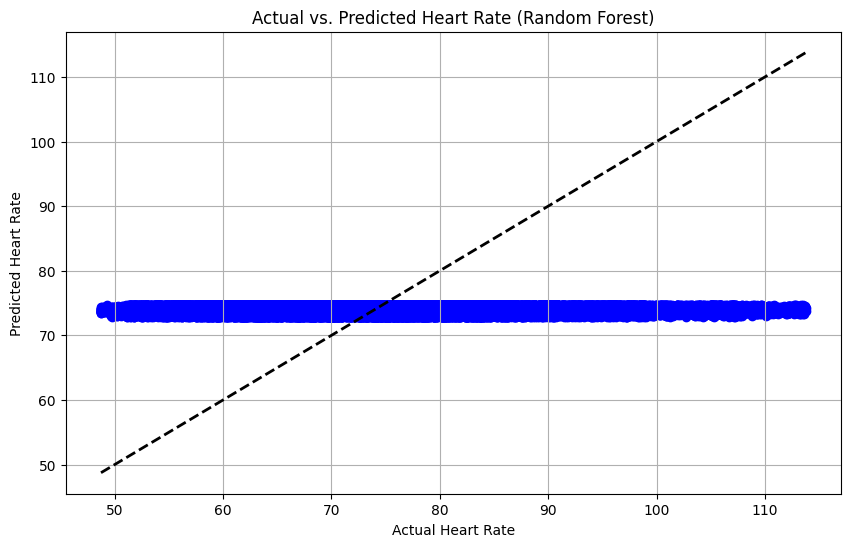

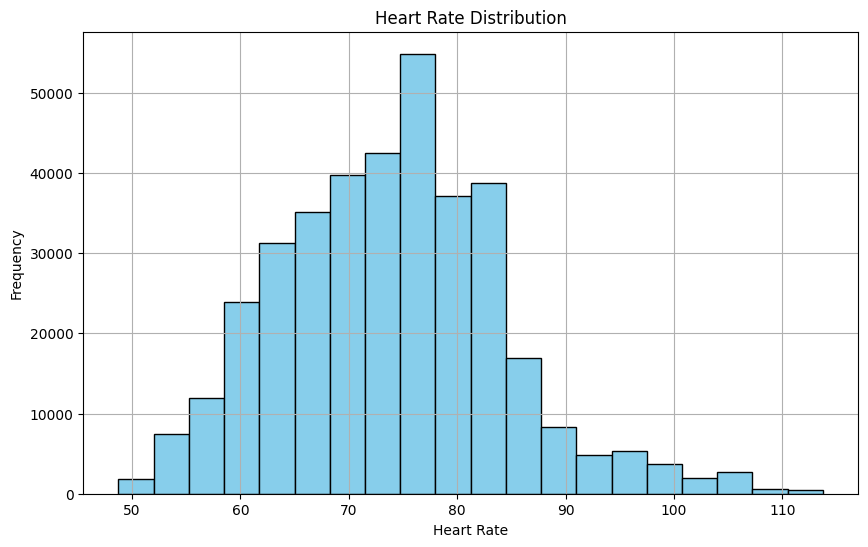

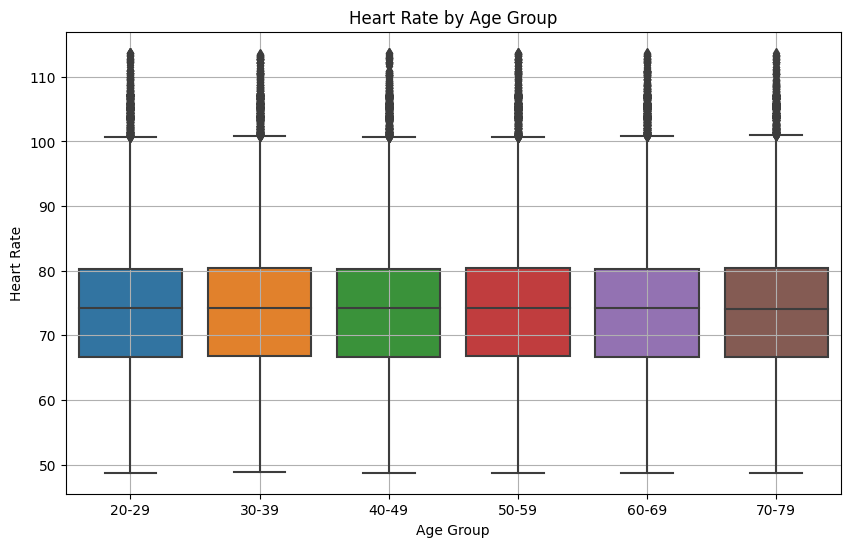

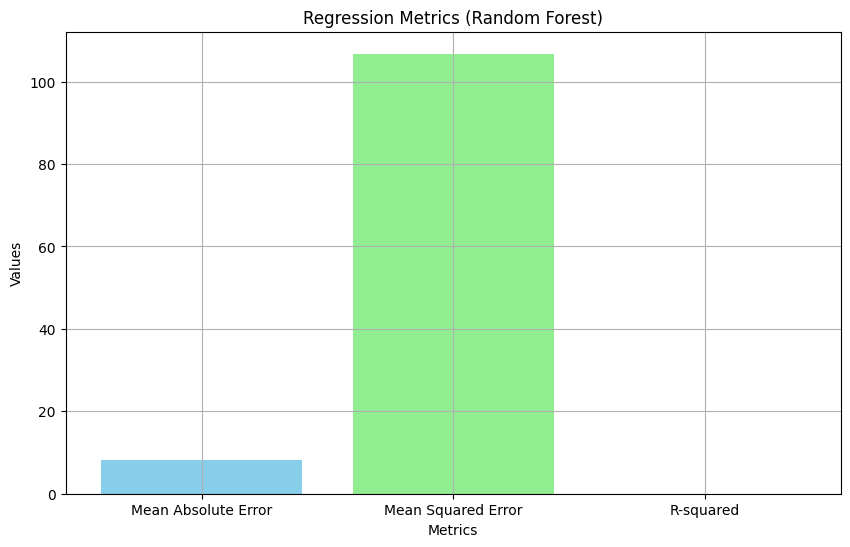

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot predicted heart rates for future dates
plt.figure(figsize=(10, 6))
plt.plot(future_data['date'], future_heart_rate, label='Predicted Heart Rate', marker='o')
plt.xlabel('Date')
plt.ylabel('Heart Rate')
plt.title('Predicted Heart Rate for Future Dates (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for actual vs. predicted heart rate
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Heart Rate')
plt.ylabel('Predicted Heart Rate')
plt.title('Actual vs. Predicted Heart Rate (Random Forest)')
plt.grid(True)
plt.show()

# Histogram of heart rates
plt.figure(figsize=(10, 6))
plt.hist(y, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution')
plt.grid(True)
plt.show()

# Box plot of heart rate by age group
plt.figure(figsize=(10, 6))
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80],
                        labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])
sns.boxplot(x='age_group', y='HR', data=df)
plt.xlabel('Age Group')
plt.ylabel('Heart Rate')
plt.title('Heart Rate by Age Group')
plt.grid(True)
plt.show()

# Bar chart for regression metrics
metrics = ['Mean Absolute Error', 'Mean Squared Error', 'R-squared']
values = [mae, mse, r2]
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Regression Metrics (Random Forest)')
plt.grid(True)
plt.show()


fb prophet

In [27]:
!pip install prophet
!pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 58.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 17.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-cp311-cp311-linux_x86_64.whl size=271581 sha256=e8168685b9fcee24698c2ddcf1024339215b119ffae917851b29b8cf5333e0a5
  Stored in directory: /root/.cache/pip/wheels/02/20/23/74a10d0cd31f5d41c19b92ddf4c138ceff01b9f4675f19dbf5
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: requests 2.29.0
  

In [3]:
import numpy as np


In [8]:
!pip install statsmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 22.3 MB/s eta 0:00:00


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from datetime import datetime, timedelta

# Function to fetch heart rate data (assuming heart rate data is not available in this example)
def fetch_heart_rate_data():
    # Replace this with your logic to fetch heart rate data
    # For this example, we'll create a sample dataframe with date and heart rate
    today = datetime.today()
    date_list = [today - timedelta(days=i) for i in range(30)]
    heart_rate_data = pd.DataFrame({
        'ds': date_list,
        'y': [60 + 10 * (i % 7) for i in range(len(date_list))]
    })
    return heart_rate_data

# Fetch heart rate data
df = fetch_heart_rate_data()

# Ensure the column names match your dataset
df = df.rename(columns={'ds': 'ds', 'y': 'y'})

# Create the Prophet model
prophet_model = Prophet()

# Fit the model to the data
prophet_model.fit(df)

# Function to generate future data for the next two weeks
def generate_future_data(start_date, num_days):
    future_dates = [start_date + timedelta(days=i) for i in range(num_days)]
    future_data = pd.DataFrame({'ds': future_dates})
    return future_data

# Define upper and lower heart rate thresholds
upper_threshold = 100
lower_threshold = 60

# Function to check if forecasted values are outside the predefined thresholds and trigger alerts
def check_and_alert(predicted_heart_rate, upper_threshold, lower_threshold):
    if predicted_heart_rate > upper_threshold:
        return f'Alert: Heart rate above threshold ({upper_threshold}).'
    elif predicted_heart_rate < lower_threshold:
        return f'Alert: Heart rate below threshold ({lower_threshold}).'
    else:
        return 'Heart rate within normal range.'

# Get the maximum date from the dataset
max_date = pd.to_datetime(df['ds']).max()

# Generate future data for the next two weeks
start_date = max_date + timedelta(days=1)
num_days = 14  # Next two weeks
future_data = generate_future_data(start_date, num_days)


# Predict the heart rate for each future date using the Prophet model
future_heart_rate = prophet_model.predict(future_data)

# Check if the forecasted values are outside the predefined thresholds and trigger alerts
for i, row in future_heart_rate.iterrows():
    predicted_heart_rate = row['yhat']
    alert = check_and_alert(predicted_heart_rate, upper_threshold, lower_threshold)
    if 'Alert' in alert:
        print(f'At {row["ds"]}: {alert}')
    else:
        print(f'At {row["ds"]}: Heart rate prediction: {predicted_heart_rate:.2f}')


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphn_5_p4_/rey9hc5i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphn_5_p4_/d5jc8huq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21869', 'data', 'file=/tmp/tmphn_5_p4_/rey9hc5i.json', 'init=/tmp/tmphn_5_p4_/d5jc8huq.json', 'output', 'file=/tmp/tmphn_5_p4_/prophet_modelguq4sykq/prophet_model-20231018155411.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:54:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:54:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:

At 2023-10-19 15:54:10.373035: Alert: Heart rate above threshold (100).
At 2023-10-20 15:54:10.373035: Alert: Heart rate above threshold (100).
At 2023-10-21 15:54:10.373035: Heart rate prediction: 99.69
At 2023-10-22 15:54:10.373035: Heart rate prediction: 89.69
At 2023-10-23 15:54:10.373035: Heart rate prediction: 79.69
At 2023-10-24 15:54:10.373035: Heart rate prediction: 69.69
At 2023-10-25 15:54:10.373035: Alert: Heart rate below threshold (60).
At 2023-10-26 15:54:10.373035: Alert: Heart rate above threshold (100).
At 2023-10-27 15:54:10.373035: Alert: Heart rate above threshold (100).
At 2023-10-28 15:54:10.373035: Heart rate prediction: 99.39
At 2023-10-29 15:54:10.373035: Heart rate prediction: 89.39
At 2023-10-30 15:54:10.373035: Heart rate prediction: 79.39
At 2023-10-31 15:54:10.373035: Heart rate prediction: 69.39
At 2023-11-01 15:54:10.373035: Alert: Heart rate below threshold (60).


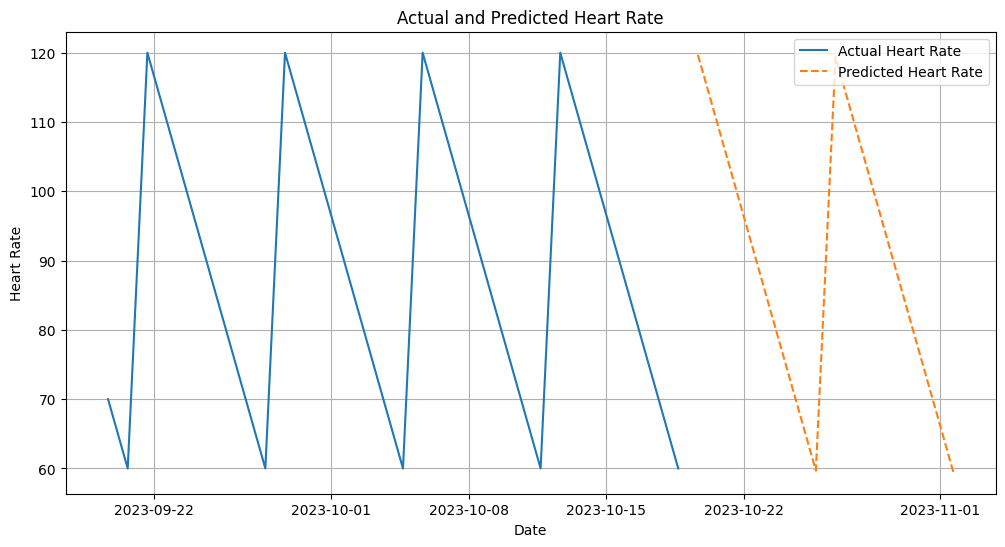

In [2]:
# Data visualization
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Actual Heart Rate')
plt.plot(future_heart_rate['ds'], future_heart_rate['yhat'], label='Predicted Heart Rate', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Heart Rate')
plt.title('Actual and Predicted Heart Rate')
plt.legend()
plt.grid(True)
plt.show()

arima model

In [14]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA

# Load the data - replace 'your_dataset.csv' with the actual filename
df = pd.read_csv('/content/train111.csv')

# Ensure the column names match your dataset
# Replace 'resting_state' and 'active_state' with the correct column names from your dataset
df = df.rename(columns={'date': 'ds', 'HR': 'y'})
df['ds'] = pd.to_datetime(df['ds'])

# Function to generate future data for the next two weeks
def generate_future_data(start_date, num_days):
    future_dates = [start_date + timedelta(days=i) for i in range(num_days)]
    future_data = pd.DataFrame({'ds': future_dates,
                                'age': np.random.randint(20, 80, num_days),
                                'resting_state': np.random.randint(60, 100, num_days),
                                'active_state': np.random.randint(60, 100, num_days)})
    return future_data

# Define upper and lower heart rate thresholds
upper_threshold = 100
lower_threshold = 60

# Function to check if forecasted values are outside the predefined thresholds and trigger alerts
def check_and_alert(predicted_heart_rate, upper_threshold, lower_threshold):
    if predicted_heart_rate > upper_threshold:
        return f'Alert: Heart rate above threshold ({upper_threshold}).'
    elif predicted_heart_rate < lower_threshold:
        return f'Alert: Heart rate below threshold ({lower_threshold}).'
    else:
        return 'Heart rate within normal range.'

# Get the maximum date from the dataset
max_date = pd.to_datetime(df['ds']).max()

# Generate future data for the next two weeks
start_date = max_date + timedelta(days=1)
num_days = 14  # Next two weeks
future_data = generate_future_data(start_date, num_days)

# Convert the dataset to a time series
df.set_index('ds', inplace=True)
df.sort_index(inplace=True)

# Fit the ARIMA model
model = ARIMA(df['y'], order=(5,1,0)) # Adjust order as needed
model_fit = model.fit()

# Predict the heart rate for each future date using the ARIMA model
future_heart_rate = model_fit.forecast(steps=num_days)

# Check if the forecasted values are outside the predefined thresholds and trigger alerts
for i in range(num_days):
    predicted_heart_rate = future_heart_rate.iloc[i]  # Access predicted heart rate at this index
    alert = check_and_alert(predicted_heart_rate, upper_threshold, lower_threshold)
    if 'Alert' in alert:
        print(f'At {future_data["ds"].iloc[i]}: {alert}')
    else:
        print(f'At {future_data["ds"].iloc[i]}: Heart rate prediction: {predicted_heart_rate:.2f}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


At 1970-01-02 00:00:00.000000015: Heart rate prediction: 67.03
At 1970-01-03 00:00:00.000000015: Heart rate prediction: 67.00
At 1970-01-04 00:00:00.000000015: Heart rate prediction: 67.82
At 1970-01-05 00:00:00.000000015: Heart rate prediction: 68.83
At 1970-01-06 00:00:00.000000015: Heart rate prediction: 68.89
At 1970-01-07 00:00:00.000000015: Heart rate prediction: 68.28
At 1970-01-08 00:00:00.000000015: Heart rate prediction: 67.98
At 1970-01-09 00:00:00.000000015: Heart rate prediction: 68.13
At 1970-01-10 00:00:00.000000015: Heart rate prediction: 68.32
At 1970-01-11 00:00:00.000000015: Heart rate prediction: 68.40
At 1970-01-12 00:00:00.000000015: Heart rate prediction: 68.33
At 1970-01-13 00:00:00.000000015: Heart rate prediction: 68.24
At 1970-01-14 00:00:00.000000015: Heart rate prediction: 68.24
At 1970-01-15 00:00:00.000000015: Heart rate prediction: 68.28


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
